In [1]:
!pip install mahotas
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mahotas
from skimage.measure import shannon_entropy
import imgaug.augmenters as iaa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import LabelBinarizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 49.8 MB/s eta 0:00:0000:0100:01


In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model

# Load mô hình ResNet50 đã huấn luyện trên ImageNet, bỏ lớp Fully Connected
base_model = ResNet50(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

# Đường dẫn dữ liệu
data_paths = {
    "Hemorrhagic": r'/kaggle/input/ischemic-hemorrhage-dataset-ihd/Ischemic-Hemorrhage Dataset (IHD)/Hemorrhagic',
    "Ischemic": r'/kaggle/input/ischemic-hemorrhage-dataset-ihd/Ischemic-Hemorrhage Dataset (IHD)/Ischemic',
    "Normal": r'/kaggle/input/ischemic-hemorrhage-dataset-ihd/Ischemic-Hemorrhage Dataset (IHD)/Normal',
}

# Lưu đặc trưng của ảnh
features_list = []

for category, path in data_paths.items():
    for file_name in os.listdir(path):
        file_path = os.path.join(path, file_name)
        
        # Đọc ảnh và resize về 224x224
        img = cv2.imread(file_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))
            img = np.expand_dims(img, axis=0)  # Thêm batch dimension
            img = preprocess_input(img)  # Tiền xử lý theo ResNet50

            # Trích xuất đặc trưng
            feature = model.predict(img)
            feature = feature.flatten()  # Chuyển tensor thành vector 1D

            # Lưu vào danh sách
            features_list.append({"Category": category, "File": file_name, "Feature": feature})

# Chuyển đặc trưng thành DataFrame
df_features = pd.DataFrame(features_list)
print(df_features.head())

# Lưu đặc trưng dưới dạng file CSV (hoặc pickle)
df_features.to_pickle("resnet50_features.pkl")  # Lưu dạng pickle để giữ nguyên numpy array


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


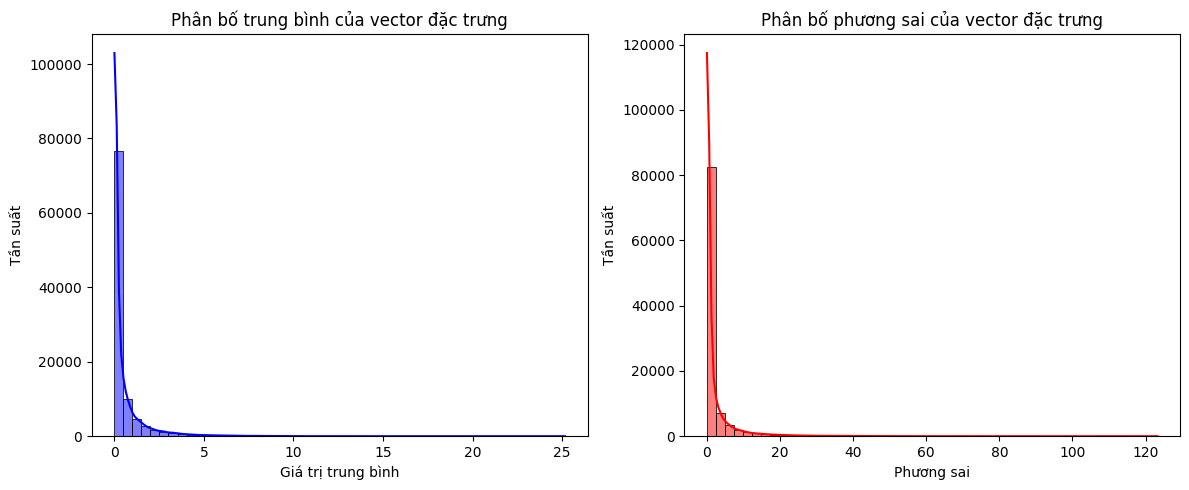

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lấy tất cả các vector đặc trưng
features_array = np.stack(df_features["Feature"].values)

# Tính giá trị trung bình và phương sai của từng đặc trưng
mean_features = features_array.mean(axis=0)
var_features = features_array.var(axis=0)

plt.figure(figsize=(12, 5))

# Biểu đồ phân bố trung bình
plt.subplot(1, 2, 1)
sns.histplot(mean_features, bins=50, kde=True, color='blue')
plt.title("Phân bố trung bình của vector đặc trưng")
plt.xlabel("Giá trị trung bình")
plt.ylabel("Tần suất")

# Biểu đồ phân bố phương sai
plt.subplot(1, 2, 2)
sns.histplot(var_features, bins=50, kde=True, color='red')
plt.title("Phân bố phương sai của vector đặc trưng")
plt.xlabel("Phương sai")
plt.ylabel("Tần suất")

plt.tight_layout()
plt.show()


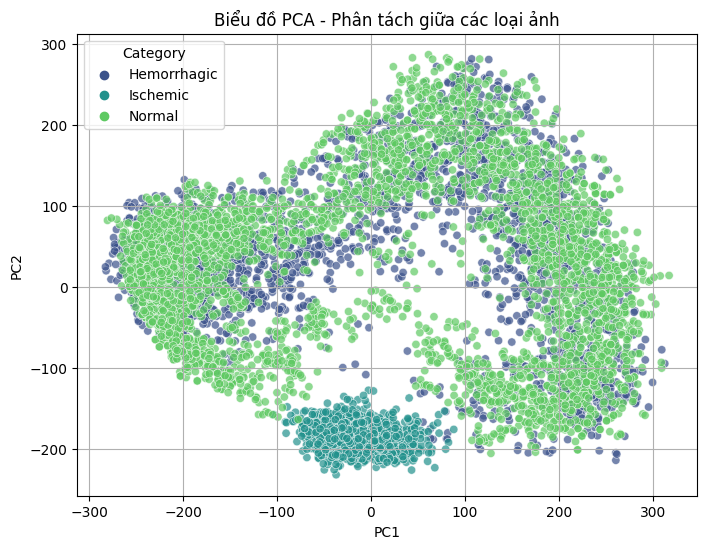

In [3]:
from sklearn.decomposition import PCA

# Giảm chiều về 2D bằng PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_array)

df_pca = pd.DataFrame(features_pca, columns=["PC1", "PC2"])
df_pca["Category"] = df_features["Category"]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Category", alpha=0.7, palette="viridis")
plt.title("Biểu đồ PCA - Phân tách giữa các loại ảnh")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Category")
plt.grid(True)
plt.show()


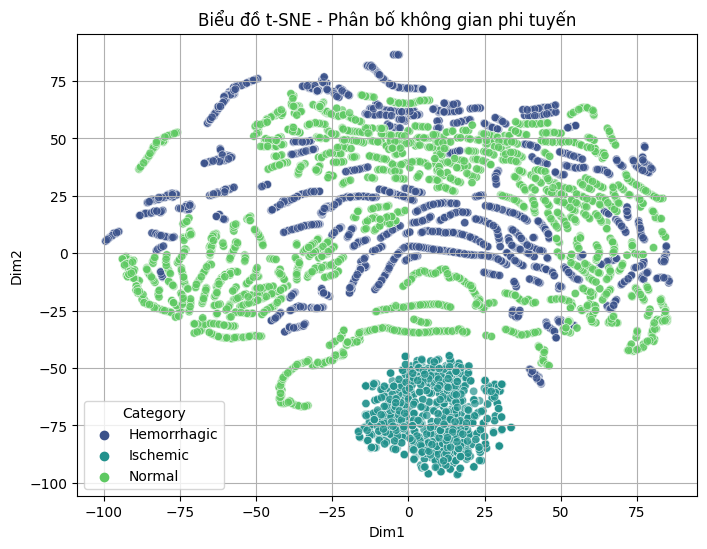

In [4]:
from sklearn.manifold import TSNE

# Giảm chiều về 2D bằng t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_tsne = tsne.fit_transform(features_array)

df_tsne = pd.DataFrame(features_tsne, columns=["Dim1", "Dim2"])
df_tsne["Category"] = df_features["Category"]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x="Dim1", y="Dim2", hue="Category", alpha=0.7, palette="viridis")
plt.title("Biểu đồ t-SNE - Phân bố không gian phi tuyến")
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.legend(title="Category")
plt.grid(True)
plt.show()


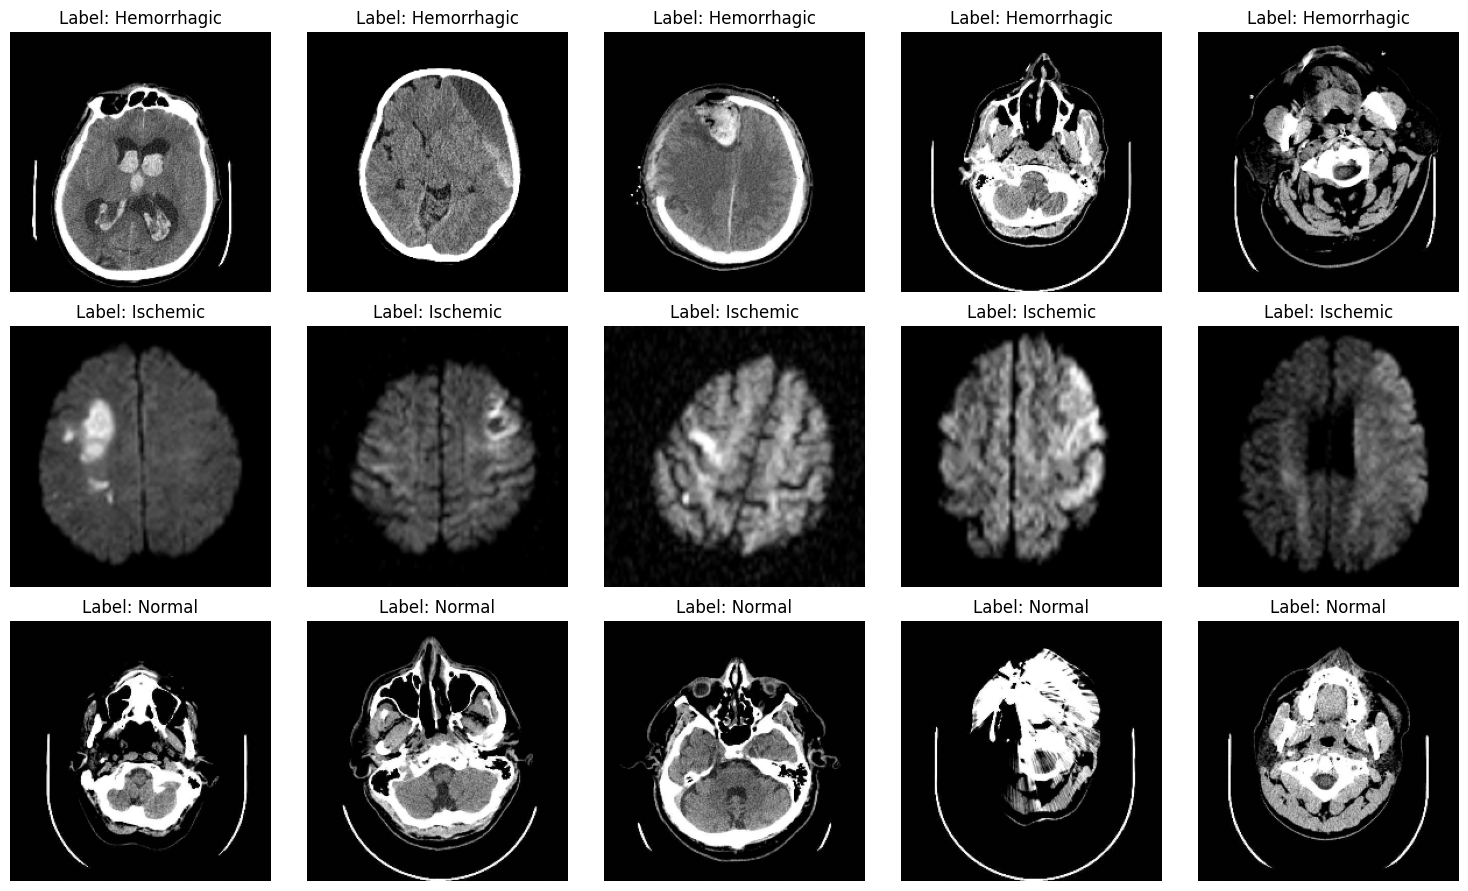

Label: Hemorrhagic, Haralick: [0.9320531124156309, 0.017421816354531668, 0.6576629708518754, 0.02542827940612313, 0.9912890918227342, 0.05222003551142798, 0.08429130126996084, 0.2504728025621867, 0.2678946189167183, 0.23290967122787723, 0.12457307877792963, -0.46498208357515164, 0.38235426517719867], Entropy: 4.11
Label: Ischemic, Haralick: [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Entropy: 4.39
Label: Normal, Haralick: [0.9033258698949994, 0.02008051220030146, 0.739510861810738, 0.03851737044361446, 0.9899597438998493, 0.08025521586664164, 0.13398896957415635, 0.3331595167681373, 0.3532400289684388, 0.23036061078222836, 0.13940139359301046, -0.545826828688638, 0.479041651020468], Entropy: 2.62


In [2]:
# Global variable for categories
categories = ["Hemorrhagic", "Ischemic", "Normal"]

# Normalization and image preprocessing
def normalize_image(img):
    return img / 255.0

def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    img_resized = cv2.resize(img, target_size)
    img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
    return normalize_image(img_resized)

# Feature extraction
def extract_features(image):
    haralick_features = mahotas.features.haralick(image.astype(np.uint8)).mean(axis=0)
    entropy = shannon_entropy(image)
    return {'haralick': haralick_features.tolist(), 'entropy': entropy}

# Dataset handling
directories = {
    "Hemorrhagic": r'/kaggle/input/ischemic-hemorrhage-dataset-ihd/Ischemic-Hemorrhage Dataset (IHD)/Hemorrhagic',
    "Ischemic": r'/kaggle/input/ischemic-hemorrhage-dataset-ihd/Ischemic-Hemorrhage Dataset (IHD)/Ischemic',
    "Normal": r'/kaggle/input/ischemic-hemorrhage-dataset-ihd/Ischemic-Hemorrhage Dataset (IHD)/Normal',
}

def load_dataset(directories):
    images, labels, image_paths, features_list = [], [], [], []
    label_map = {"Hemorrhagic": 0, "Ischemic": 1, "Normal": 2}
    for label, directory in directories.items():
        for root, _, files in os.walk(directory):
            for file in files:
                if file.endswith(('.jpg', '.png')):
                    image_path = os.path.join(root, file)
                    img = preprocess_image(image_path)
                    if img is not None:
                        images.append(img)
                        labels.append(label_map[label])
                        image_paths.append(image_path)
                        features = extract_features(img)
                        features_list.append({'label': label_map[label], 'haralick': features['haralick'], 'entropy': features['entropy']})
    return images, labels, image_paths, features_list

images, labels, image_paths, features_list = load_dataset(directories)

# Image display function
def display_images(images, labels, num_images_per_category=5):
    fig, axes = plt.subplots(len(categories), num_images_per_category, figsize=(num_images_per_category * 3, len(categories) * 3))
    img_count = {category: 0 for category in categories}
    for i, img in enumerate(images):
        category_label = categories[labels[i]]
        if img_count[category_label] < num_images_per_category:
            ax = axes[categories.index(category_label), img_count[category_label]]
            ax.imshow(img, cmap='gray')
            ax.set_title(f"Label: {category_label}")
            ax.axis('off')
            img_count[category_label] += 1
    plt.tight_layout()
    plt.show()

# One-hot encoding
def one_hot_encode(labels):
    label_binarizer = LabelBinarizer()
    return label_binarizer.fit_transform(labels)

# Mã hóa nhãn của toàn bộ dataset
labels_onehot = one_hot_encode(labels)
display_images(images, labels)

# Corrected feature display logic
categories_displayed = set()
for feature in features_list:
    label = categories[feature['label']]
    if label not in categories_displayed:
        print(f"Label: {label}, Haralick: {feature['haralick']}, Entropy: {feature['entropy']:.2f}")
        categories_displayed.add(label)
        if len(categories_displayed) == 3:
            break

      Category                File  Height  Width
0  Hemorrhagic         14_0_67.jpg     512    512
1  Hemorrhagic  IMG-0001-00091.jpg     512    512
2  Hemorrhagic        11_0_149.jpg     512    512
3  Hemorrhagic         1_0_228.jpg     512    512
4  Hemorrhagic         7_0_147.jpg     512    512
Thống kê kích thước ảnh:
            Height        Width
count  7338.000000  7338.000000
mean    524.070864   525.197602
std      36.265237    46.398901
min     386.000000   372.000000
25%     512.000000   512.000000
50%     512.000000   512.000000
75%     512.000000   512.000000
max     732.000000  1006.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


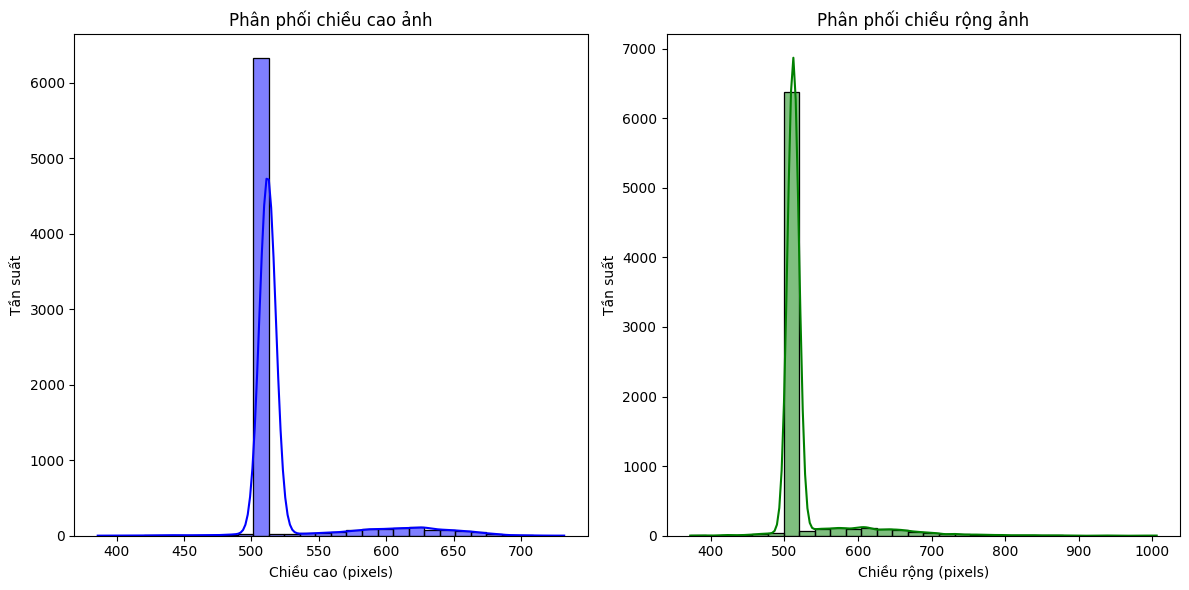

Kích thước phổ biến nhất:
     Height  Width  Count
83      512    512   6317
614     621    566      3
419     597    597      2
336     586    601      2
768     638    527      2
Kích thước bất thường:
Empty DataFrame
Columns: [Category, File, Height, Width]
Index: []


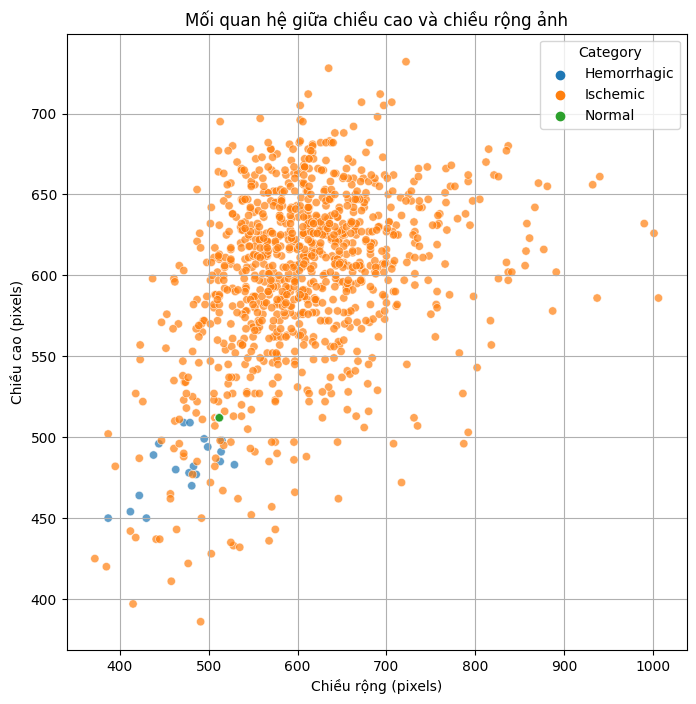

In [3]:
import os
import cv2
import pandas as pd

# Đường dẫn tới các thư mục
data_paths = {
    "Hemorrhagic": r'/kaggle/input/ischemic-hemorrhage-dataset-ihd/Ischemic-Hemorrhage Dataset (IHD)/Hemorrhagic',
    "Ischemic": r'/kaggle/input/ischemic-hemorrhage-dataset-ihd/Ischemic-Hemorrhage Dataset (IHD)/Ischemic',
    "Normal": r'/kaggle/input/ischemic-hemorrhage-dataset-ihd/Ischemic-Hemorrhage Dataset (IHD)/Normal',
}

# Danh sách lưu thông tin kích thước ảnh
image_sizes = []

for category, path in data_paths.items():
    for file_name in os.listdir(path):
        file_path = os.path.join(path, file_name)
        img = cv2.imread(file_path)  # Đọc ảnh
        if img is not None:
            height, width = img.shape[:2]
            image_sizes.append({"Category": category, "File": file_name, "Height": height, "Width": width})

# Chuyển dữ liệu sang DataFrame để phân tích
df_sizes = pd.DataFrame(image_sizes)
print(df_sizes.head())

print("Thống kê kích thước ảnh:")
print(df_sizes.describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Phân phối chiều cao
plt.subplot(1, 2, 1)
sns.histplot(df_sizes["Height"], kde=True, bins=30, color='blue')
plt.title("Phân phối chiều cao ảnh")
plt.xlabel("Chiều cao (pixels)")
plt.ylabel("Tần suất")

# Phân phối chiều rộng
plt.subplot(1, 2, 2)
sns.histplot(df_sizes["Width"], kde=True, bins=30, color='green')
plt.title("Phân phối chiều rộng ảnh")
plt.xlabel("Chiều rộng (pixels)")
plt.ylabel("Tần suất")

plt.tight_layout()
plt.show()

# Kích thước phổ biến nhất
common_sizes = df_sizes.groupby(["Height", "Width"]).size().reset_index(name='Count')
print("Kích thước phổ biến nhất:")
print(common_sizes.sort_values(by="Count", ascending=False).head())

# Kích thước bất thường
unusual_sizes = df_sizes[(df_sizes["Height"] < 100) | (df_sizes["Width"] < 100)]
print("Kích thước bất thường:")
print(unusual_sizes)

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_sizes, x="Width", y="Height", hue="Category", alpha=0.7)
plt.title("Mối quan hệ giữa chiều cao và chiều rộng ảnh")
plt.xlabel("Chiều rộng (pixels)")
plt.ylabel("Chiều cao (pixels)")
plt.legend(title="Category")
plt.grid(True)
plt.show()

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Split dataset into train, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels_onehot, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Load ResNet50 as a base model, ensure include_top is False to customize output layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Make all layers in the base model non-trainable
for layer in base_model.layers:
    layer.trainable = False

# You can now get outputs directly from any layer of the base model
# For Grad-CAM, we are particularly interested in 'conv5_block3_out'
layer_outputs = {layer.name: layer.output for layer in base_model.layers}
conv5_block3_out = layer_outputs['conv5_block3_out']

# Create new output layers for your model
x = GlobalAveragePooling2D()(conv5_block3_out)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
final_output = Dense(3, activation='softmax')(x)  # assuming you have 3 classes

# Construct the complete model
model = Model(inputs=base_model.input, outputs=final_output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Continue with your model training and evaluation
# Train the model
history = model.fit(
    np.array(train_images), np.array(train_labels),
    validation_data=(np.array(val_images), np.array(val_labels)),
    epochs=50,
    batch_size=16
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(np.array(test_images), np.array(test_labels))
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('C:/Users/ADMIN\Documents/STROKE_PROJECT_2024/resnet50_final.h5')  # You can change the path and filename as needed

print("Model saved successfully.")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.6093 - loss: 0.7235 - val_accuracy: 0.6697 - val_loss: 0.5597
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.6937 - loss: 0.5613 - val_accuracy: 0.7442 - val_loss: 0.5378
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.6978 - loss: 0.5440 - val_accuracy: 0.7280 - val_loss: 0.4962
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - accuracy: 0.7291 - loss: 0.5049 - val_accuracy: 0.7414 - val_loss: 0.4641
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.7424 - loss: 0.4802 - val_accuracy: 0.7393 - val_loss: 0.4718
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.7713 - loss: 0.4539 - val_accuracy: 0.8067 - val_loss: 0.4141
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.7802 - loss: 0.4407 - val_accuracy: 0.7969 - val_loss: 0.4023
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.7976 - loss: 0.4184 -

134/134 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step


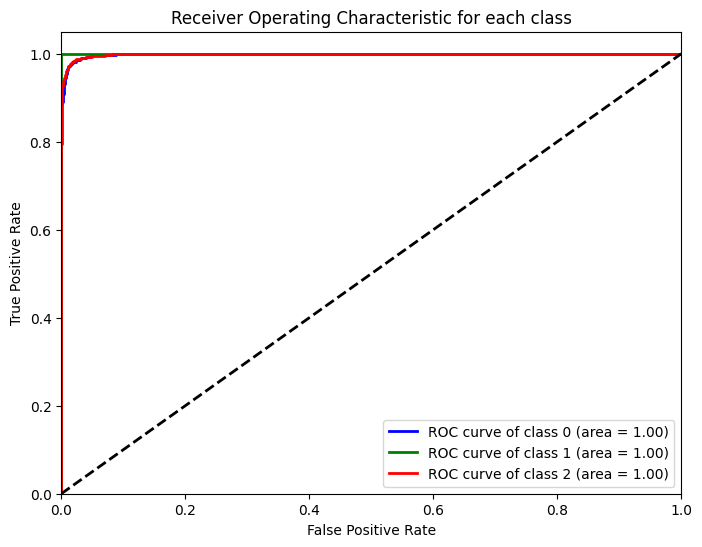

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dự đoán xác suất trên tập huấn luyện
train_predictions = model.predict(np.array(train_images))

# Tính toán các chỉ số cho ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Số lớp của bạn là 3
    fpr[i], tpr[i], _ = roc_curve(train_labels[:, i], train_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Vẽ đồ thị ROC cho từng lớp
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

In [7]:
from tensorflow.keras.models import load_model

# Đường dẫn đến file mô hình đã lưu
model_path = '/kaggle/working/C:/Users/ADMIN\Documents/STROKE_PROJECT_2024/resnet50_final.h5'

# Tải mô hình
model = load_model(model_path)

# Hiện tại, mô hình đã sẵn sàng để sử dụng

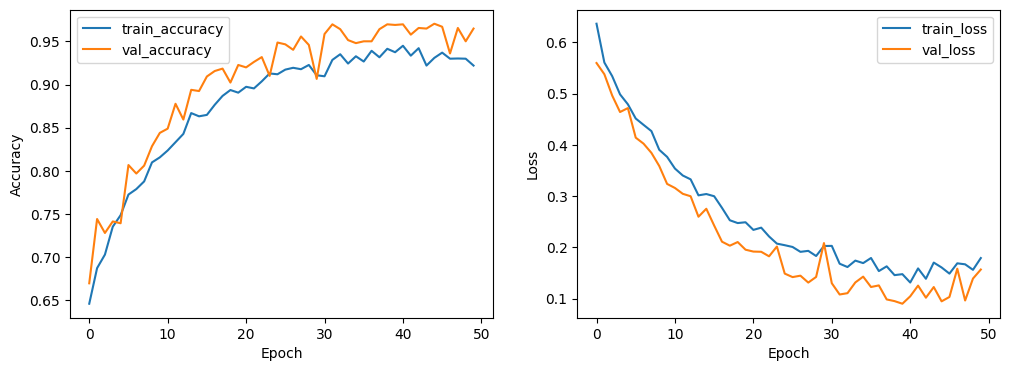

In [8]:
import matplotlib.pyplot as plt
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


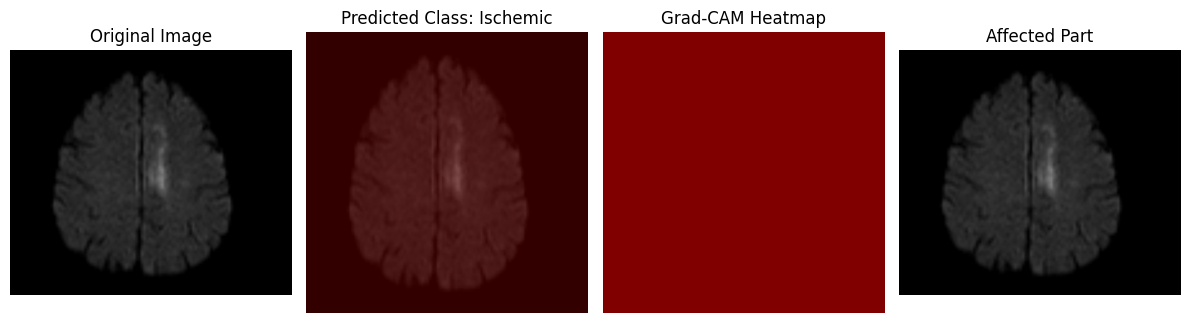

In [16]:
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

def Affected_Area(img_path):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresholded_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image

# Load model
model_path = '/kaggle/working/C:/Users/ADMIN\Documents/STROKE_PROJECT_2024/resnet50_final.h5'
model = keras.models.load_model(model_path)

# Ensure that the specific layer exists
if 'conv5_block3_out' in [layer.name for layer in model.layers]:
    grad_model = keras.models.Model(inputs=model.input, outputs=[model.get_layer("conv5_block3_out").output, model.output])
else:
    print("Layer 'conv5_block3_out' not found in the model.")
    
# Load and preprocess image
img_path = r'/kaggle/input/ischemic-hemorrhage-dataset-ihd/Ischemic-Hemorrhage Dataset (IHD)/Ischemic/108.JPG'
img = cv2.imread(img_path)
img_resized = cv2.resize(img, (224, 224))
img_resized = np.expand_dims(img_resized, axis=0) / 255.0

# Model Prediction
predicted_class = model.predict(img_resized)
predicted_class_index = np.argmax(predicted_class)

class_names = ['Hemorrhagic', 'Ischemic', 'Normal']
predicted_class_label = class_names[predicted_class_index] if predicted_class_index < len(class_names) else "Unknown"

# Visualization
img_resized_uint8 = (img_resized[0] * 255).astype(np.uint8)
grad_model = keras.models.Model(inputs=model.input, outputs=[model.get_layer("conv5_block3_out").output, model.output])

with tf.GradientTape() as tape:
    inputs = tf.cast(img_resized, tf.float32)
    tape.watch(inputs)
    conv_outputs, predictions = grad_model(inputs)
    loss = predictions[:, predicted_class_index]

grads = tape.gradient(loss, conv_outputs)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs[0]), axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
heatmap = cv2.resize(np.uint8(255 * heatmap), (224, 224))
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img_resized_uint8, 0.6, heatmap, 0.4, 0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(superimposed_img)
plt.title(f'Predicted Class: {predicted_class_label}')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(heatmap)
plt.title('Grad-CAM Heatmap')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(Affected_Area(img_path), cv2.COLOR_BGR2RGB))
plt.title('Affected Part')
plt.axis('off')
plt.tight_layout()
plt.show()